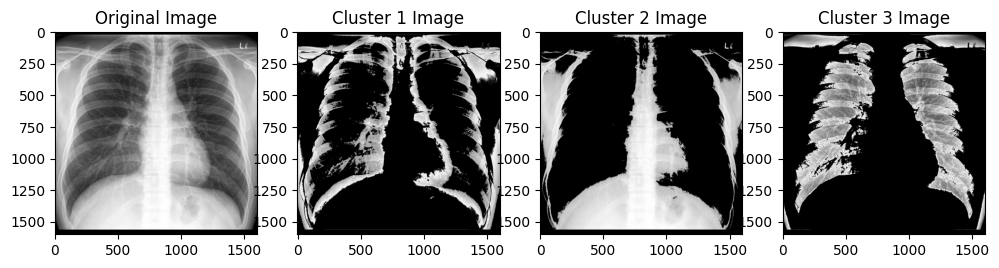

In [6]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Load the chest X-ray image
image_path = "normal-frontal-chest-x-ray.jpg"
image = cv2.imread(image_path)

# Step 2: Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 3: Flatten the image
flat_gray_image = gray_image.reshape((-1, 1))

# Step 4: Apply K-means clustering
k = 3  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=0).fit(flat_gray_image)
clustered_labels = kmeans.labels_

# Step 5: Reshape the clustered labels back to the original image shape
clustered_image = clustered_labels.reshape(gray_image.shape)

# Step 6: Display the original and clustered images
# Display the original and clustered images
plt.figure(figsize=(12, 6))
plt.subplot(1, k + 1, 1), plt.imshow(gray_image, cmap="gray"), plt.title(
    "Original Image"
)

# Display an image for each cluster
for i in range(k):
    # Create a mask for the current cluster
    mask = clustered_image == i

    # Apply the mask to the grayscale image to isolate the cluster
    cluster_image = np.zeros_like(gray_image)
    cluster_image[mask] = gray_image[mask]

    # Display the image for the current cluster
    plt.subplot(1, k + 1, i + 2), plt.imshow(cluster_image, cmap="gray"), plt.title(
        f"Cluster {i+1} Image"
    )

plt.show()